(activity13_solution)=

# Activity 13 Solution: RDDs

**2025-04-08**

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [7]:
gov_transfers = pd.read_csv("~/COMSC-341CD/data/gov_transfers.csv")

The columns we have in the dataset are:

- $R$ `Income_Centered`: the predicted income of the household, centered at 0
- $T$ `Participation`: whether the household participated in the poverty alleviation program
- $Y$ `Support`: the amount of goverment support, encoded as a survery question: 
    - In relation to the previous government, do you believe that the current government is worse (0), the same (1/2), better (1)?


In [8]:
gov_transfers.head()

,Income_Centered,Participation,Support
0,0.006571,0,1.0
1,0.011075,0,1.0
2,0.002424,0,1.0
3,0.007650,0,0.5
4,0.010001,0,1.0


# Part 1

Let's first visualize how the treatment assignment is related to the income. Use [pd.cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) with `bins=20` and `labels=False` to bin the income data into 20 bins:

In [9]:
# TODO your code here
gov_transfers['income_bin'] = pd.cut(gov_transfers['Income_Centered'], bins=20, labels=False)
gov_transfers.head()

,Income_Centered,Participation,Support,income_bin
0,0.006571,0,1.0,13
1,0.011075,0,1.0,15
2,0.002424,0,1.0,11
3,0.007650,0,0.5,13
4,0.010001,0,1.0,15


Next, generate a `sns.pointplot` of `y=Participation` vs `x=income_bin`. Set `linestyle='none'` to plot the points individually. 


Discuss with folks around you: Do you observe any deviations from the policy of assigning participation in the transfer program based on income? Does this suggest that the RDD is "sharp" or not?

**Your response:** [pollev.com/tliu](https://pollev.com/tliu)

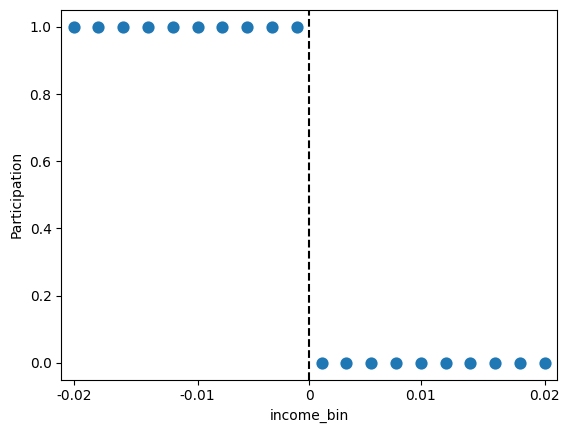

In [10]:
# TODO your code here
sns.pointplot(x='income_bin', y='Participation', data=gov_transfers, linestyle='none')
# convert the xticks to the same units as the original income data
plt.xticks(ticks=[0, 5, 9.5, 14, 19], labels=[-0.02, -0.01, 0, 0.01, 0.02])
# plot the cutoff as a vertical line
plt.axvline(x=9.5, color='black', linestyle='--', label='Income cutoff')

# Part 2

Now we'll look at the outcome variable, `Support`. Generate a `sns.pointplot` of `y=Support` vs `x=income_bin`. Set `linestyle='none'` to plot the points individually. 

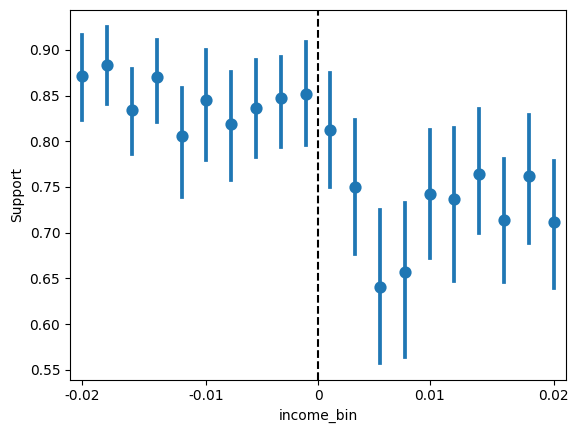

In [11]:
# TODO your code here
sns.pointplot(x='income_bin', y='Support', data=gov_transfers, linestyle='none')
plt.xticks(ticks=[0, 5, 9.5, 14, 19], labels=[-0.02, -0.01, 0, 0.01, 0.02])
plt.axvline(x=9.5, color='black', linestyle='--', label='Income cutoff')


On Worksheet 5, we fit two linear regressions on either side of the cutoff. Another approach to estimating the average treatment effect is to fit a single linear regression that allows the slope to change at the cutoff:

$$
Y = \beta_0 + \beta_1 (R - c) + \beta_2 T + \beta_3 (R -c ) \cdot T 
$$

Since $c=0$, this simplifies to:

$$
Y = \beta_0 + \beta_1 R + \beta_2 T + \beta_3 R\cdot T
$$

The average treatment effect at the cutoff is then given by $\beta_2$.









In [12]:
# TODO your code here
rdd_formula = 'Support ~ 1 + Income_Centered + Participation + Income_Centered*Participation'
rdd_model = smf.ols(rdd_formula, data=gov_transfers).fit()
print(rdd_model.params['Participation'])

0.09985188527415911


What is your estimate of the average treatment effect at the cutoff (rounded to 1 decimal place)?

**Your response:** [pollev.com/tliu](https://pollev.com/tliu)

# Acknowledgements

This activity uses data from Nick Huntington-Klein's `causaldata` package.